<a href="https://www.bharathkreddy.com"><img align="left" src="https://i.imgur.com/axjt3Qe.png" alt="WWW.BHARARTHKREDDY.COM" title="www.bharathkreddy.com"></a>
# [www.bharathkreddy.com](https://www.bharathkreddy.com)

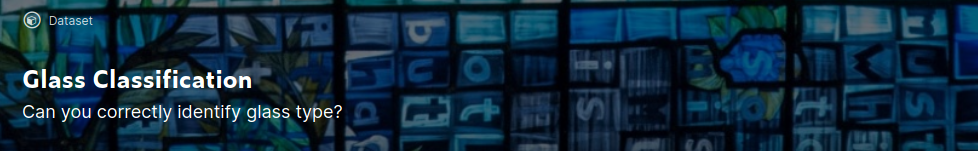

## Context

This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)
Content

## Attribute Information:

    Id number**: 1 to 214 (removed from CSV file)
    RI: refractive index
    Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
    Mg: Magnesium
    Al: Aluminum
    Si: Silicon
    K: Potassium
    Ca: Calcium
    Ba: Barium
    Fe: Iron
    Type of glass: (class attribute)
    -- 1 buildingwindowsfloatprocessed -- 2 buildingwindowsnonfloatprocessed -- 3 vehiclewindowsfloatprocessed
    -- 4 vehiclewindowsnonfloatprocessed (none in this database)
    -- 5 containers
    -- 6 tableware
    -- 7 headlamps

If you are more interested about data and its attributes, you can find details [here](https://github.com/bharathkreddy/ML-Bootcamp/blob/master/data/glass.names), you can find the dataset [here](https://github.com/bharathkreddy/ML-Bootcamp/blob/master/data/glass.data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/bharathkreddy/ML-Bootcamp/master/data/glass.csv",
                names= ['ri','na','mg','al','si','k','ca','ba','fe','type'])
df

,ri,na,mg,al,si,k,ca,ba,fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df['type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: type, dtype: int64

## I am going to skip EDA part
## All the measurements are in cm so no need of scaling
## Data doesnt have any missing values and hence no need of any treatment.

In [5]:
X = df.drop(['type'],axis=1)
y = df['type']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [7]:
y_train_pred = clf.predict(X_train)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        21

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



In [8]:
y_test_pred = clf.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.67      0.91      0.77        11
           2       1.00      0.57      0.73        14
           3       0.75      1.00      0.86         3
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.84        43
   macro avg       0.87      0.91      0.87        43
weighted avg       0.88      0.84      0.83        43



[Text(745.5968406593407, 1048.3714285714286, 'X[7] <= 0.335\ngini = 0.724\nsamples = 171\nvalue = [59, 62, 14, 9, 6, 21]'),
 Text(497.83104395604397, 970.7142857142858, 'X[3] <= 1.42\ngini = 0.672\nsamples = 150\nvalue = [58, 61, 14, 8, 6, 3]'),
 Text(235.3104395604396, 893.0571428571429, 'X[2] <= 2.785\ngini = 0.603\nsamples = 94\nvalue = [52, 26, 11, 1, 2, 2]'),
 Text(98.10989010989012, 815.4000000000001, 'X[0] <= 1.521\ngini = 0.514\nsamples = 12\nvalue = [0, 8, 0, 1, 2, 1]'),
 Text(73.58241758241759, 737.7428571428572, 'X[1] <= 13.755\ngini = 0.722\nsamples = 6\nvalue = [0, 2, 0, 1, 2, 1]'),
 Text(49.05494505494506, 660.0857142857144, 'X[3] <= 1.01\ngini = 0.625\nsamples = 4\nvalue = [0, 2, 0, 1, 0, 1]'),
 Text(24.52747252747253, 582.4285714285714, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(73.58241758241759, 582.4285714285714, 'X[5] <= 1.515\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 0, 1, 0, 1]'),
 Text(49.05494505494506, 504.7714285714286, 'gini = 0.0\nsamples =

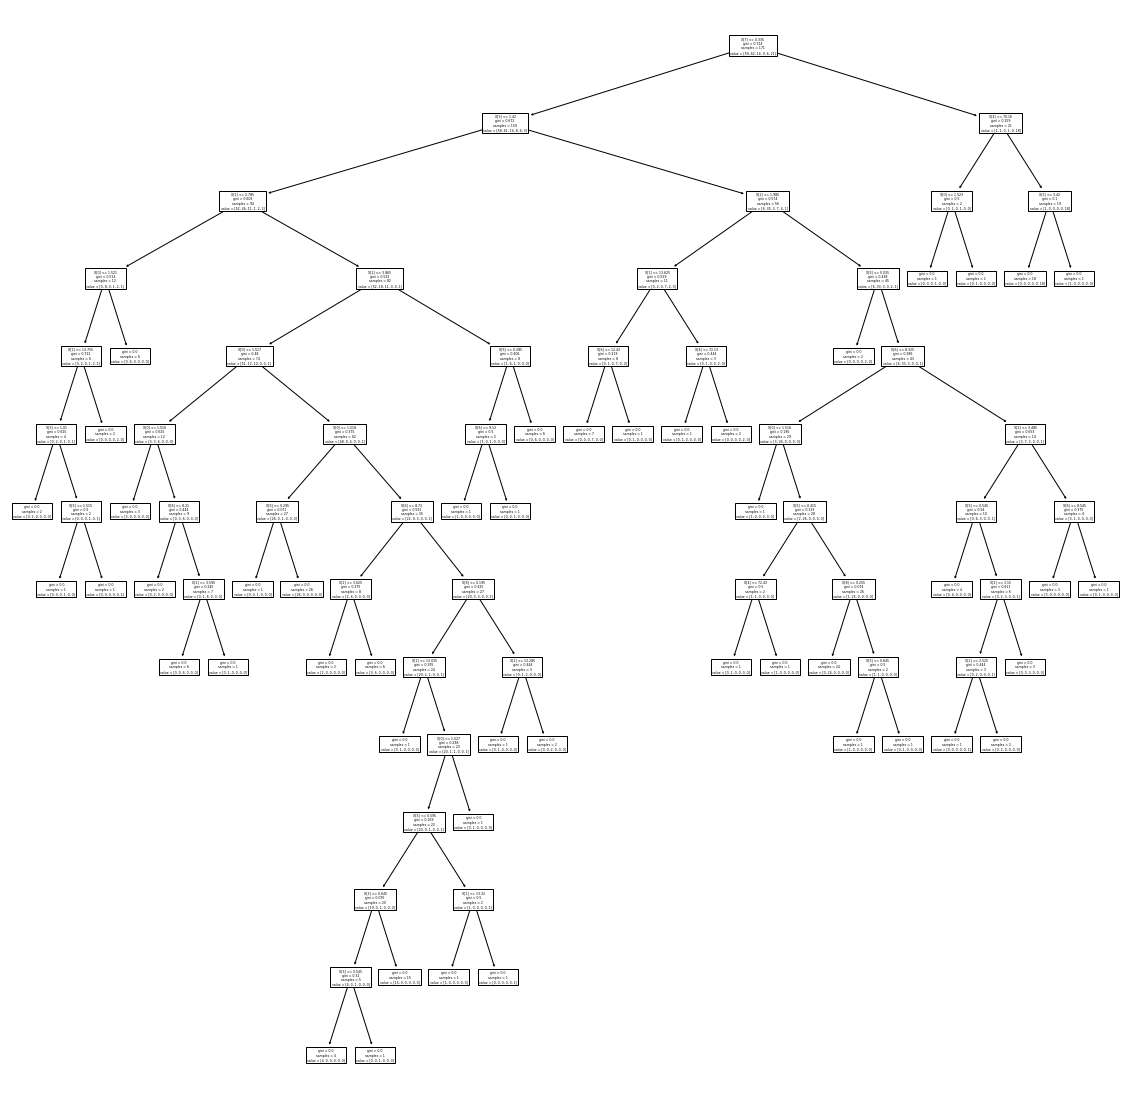

In [9]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf)

## Notice - the model has overfit
### When your model performs extreemly well on training data but performs poorly on test set by a huge marging - it is an idication of OVERFITING

In [12]:
clf = tree.DecisionTreeClassifier(criterion='gini',
                                    max_depth=8,
                                    min_samples_split=10,
                                    min_samples_leaf=5)
clf = clf.fit(X_train,y_train)
y_test_pred = clf.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.77      0.91      0.83        11
           2       0.73      0.79      0.76        14
           3       0.50      0.33      0.40         3
           5       0.80      1.00      0.89         4
           6       0.00      0.00      0.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.79        43
   macro avg       0.63      0.67      0.65        43
weighted avg       0.73      0.79      0.76        43



/home/bharath/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## By Pruning the tree to limit its depth, we are able to generallize it better. Compare the accruacy scores, we jump from 74% to 77% just by changing max_depth.